# 01-Quantopian Research Basics

**Please remember that this notebook will only work on Quantopian! Make an account and upload this notebook file. These commands and functions won't work except on the Quantopian trading platform!**

Note a lot of the written markdown text in this notebook comes direclty from the Quantopian docs and tutorials, definitely check those out as well, they're great!

## Research

The notebook format allows us to easily gather information about variuos securities all within the Quantopian platform. Keep in mind this is different than the base coding platform of quantopian, which focuses on actually implementing and backtesting trading strategies.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# NO NEED TO DO MAGIC INLINE COMMAND ON QUANTOPIAN!

## Getting Information

Let's go over a few key functions:

* get_pricing()
* symbols()
* local_csv()
* get_backtest()
* get_fundamentals()

## get_pricing()

The `get_pricing` function provides access to 12 years of US Equity pricing data: the same data used by the Quantopian backtester.

`get_pricing` returns a <b>pandas object</b>. This could be a panel, dataframe or series depending on the input values. 

In [17]:
mcdon = get_pricing('MCD',
                    start_date='2017-01-01', 
                    end_date = '2017-02-01', 
                    frequency='minute')

In [18]:
mcdon.head()

,open_price,high,low,close_price,volume,price
2017-01-03 14:31:00+00:00,121.86,121.86,121.57,121.63,123665.0,121.63
2017-01-03 14:32:00+00:00,121.73,121.92,121.41,121.45,13536.0,121.45
2017-01-03 14:33:00+00:00,121.45,121.79,121.45,121.52,17562.0,121.52
2017-01-03 14:34:00+00:00,121.45,121.80,121.44,121.75,12072.0,121.75
2017-01-03 14:35:00+00:00,121.74,122.00,121.66,121.99,8100.0,121.99


In [19]:
mcdon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2017-01-03 14:31:00+00:00 to 2017-02-01 21:00:00+00:00
Data columns (total 6 columns):
open_price     8188 non-null float64
high           8188 non-null float64
low            8188 non-null float64
close_price    8188 non-null float64
volume         8190 non-null float64
price          8190 non-null float64
dtypes: float64(6)
memory usage: 447.9 KB


In [33]:
# Can only go about 12 years back
# which is really all you need for algo trading, 
# going back further probably is more noise than signal.

mcdon = get_pricing('MCD',
                    start_date='2005-01-01', 
                    end_date = '2017-01-01', 
                    frequency='daily')

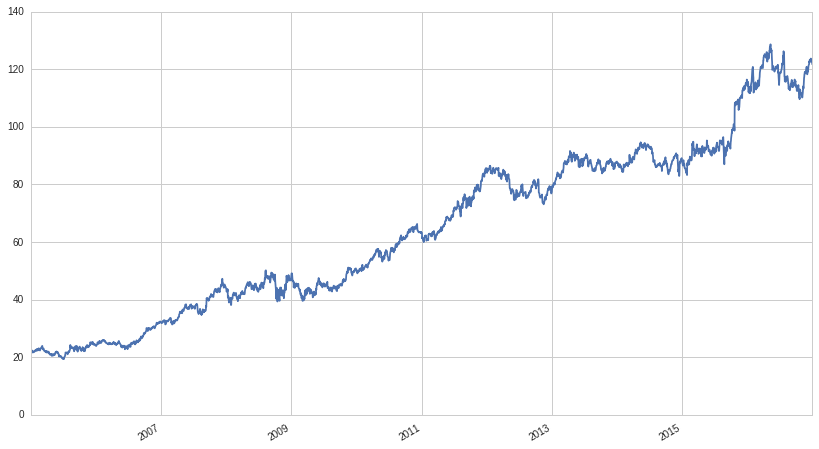

In [34]:
mcdon['close_price'].plot()

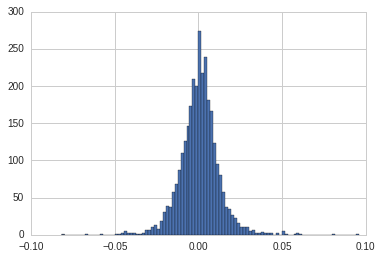

In [35]:
mcdon['close_price'].pct_change(1).hist(bins=100,figsize=(6,4))

## symbols()

By default `symbols` returns the security object for a ticker symbol. Specify a ticker symbol, or list of symbols, as a string and get a list of security objects back. 

- Use `symbol_reference_date` to identify which date you want the symbol back for a particular ticker symbol. 
- Specify how you would like missing results to be handled with `handle_missing`



In [39]:
mcdon_eq_info = symbols('MCD')

In [41]:
type(mcdon_eq_info)

<type 'zipline.assets._assets.Equity'>

In [48]:
for key in mcdon_eq_info.to_dict():
    print(key)
    print(mcdon_eq_info.to_dict()[key])
    print('\n')

end_date
2017-07-19 00:00:00+00:00


exchange
NYSE


auto_close_date
2017-07-24 00:00:00+00:00


symbol
MCD


first_traded
None


asset_name
MCDONALDS CORP


exchange_full
NEW YORK STOCK EXCHANGE


sid
4707


start_date
2002-01-01 00:00:00+00:00




## get_fundamentals()

The `get_fundamentals` function provides programmatic access to the Quantopian fundamental database. Based on data provided by Morningstar, `get_fundamentals` provides over 600 corporate metrics dating back to 2002 (to match Quantopian's pricing data). 

The data used by this research function is the same data used by the `get_fundamentals` function used in the Quantopian IDE. The fields are described in the Quantopian help documents: http://www.quantopian.com/help/fundamentals.


In [49]:
# Have to do this first in the notebook:
fundamentals = init_fundamentals()

The get_fundamentals() function takes in a SQLAlchemy query which can be quite complicated and strange looking at first. Basically it allows you to filter by a variety of fundamentals (things like Market Cap, P/E Ratio, or even city of HQ). Check out the link above for all the things you can filter by!

Let's walk through a few query examples.

First call fundamentals and use tab to check out the various options:

In [55]:
fundamentals. # call tab here as in the video!

SyntaxError: invalid syntax (<ipython-input-55-bbf6938c8013>, line 1)

In [57]:
# Market Cap
my_query = query(fundamentals.valuation.market_cap)

In [59]:
my_funds = get_fundamentals(my_query,'2017-01-01')

In [62]:
my_funds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, market_cap to market_cap
Columns: 5551 entries, Equity(21 [AAME]) to Equity(50554 [HEBT])
dtypes: float64(5551)
memory usage: 43.4+ KB


In [64]:
# Basically just returns the market cap of everything
# for 2017-01-01
my_funds.head()

,Equity(21 [AAME]),Equity(24 [AAPL]),Equity(25 [ARNC_PR]),Equity(31 [ABAX]),Equity(39 [DDC]),Equity(41 [ARCB]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(64 [ABX]),...,Equity(50533 [CNDT]),Equity(50534 [HGV]),Equity(50535 [PK]),Equity(50537 [WRD]),Equity(50539 [TIG]),Equity(50540 [TRVG]),Equity(50541 [KEY_PRI]),Equity(50544 [KEG]),Equity(50547 [YTRA]),Equity(50554 [HEBT])
market_cap,80256300.0,6.224410e+11,NaN,1.190750e+09,808964000.0,722555000.0,2.265560e+09,4.927210e+09,5.640420e+10,1.910140e+10,...,3.029760e+09,2.559150e+09,5.890500e+09,1.734880e+09,2.265930e+09,2.741480e+09,NaN,26639500.0,329764000.0,91800000.0


In [74]:
# What you usualy do is filter by other qualities after the query!

# Only get companies worth 500 billion or more (that's a lot of dough!)
big_companies = (query(fundamentals.valuation.market_cap).
                 filter(fundamentals.valuation.market_cap > 500000000000) )

In [75]:
my_big_funds = get_fundamentals(big_companies,'2017-07-19')

In [76]:
# On 
my_big_funds

,Equity(24 [AAPL]),Equity(5061 [MSFT]),Equity(26578 [GOOG_L]),Equity(46631 [GOOG])
market_cap,7.824930e+11,5.659140e+11,6.752440e+11,6.752440e+11


In [70]:
7.82 * 10**11

782000000000.0

In [50]:
get_fundamentals()

TypeError: get_fundamentals() takes at least 2 arguments (0 given)